# Imports

In [90]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/user/github/phd/sentiment-backend/')

from typing import NamedTuple, List

import numpy as np
import pandas as pd

from tqdm import tqdm

from aspects.embeddings.graph.conceptnet_hierarchies_check import AspectNeighborhood
from aspects.data_io import serializer
from aspects.utilities import settings
from aspects.utilities.data_paths import ExperimentPaths

import matplotlib
%matplotlib inline

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load experiment data

In [160]:
experiment_paths = ExperimentPaths(
    input_path='',
#     output_path=settings.DEFAULT_OUTPUT_PATH / 'reviews_Cell_Phones_and_Accessories-50000-docs',
    output_path=settings.DEFAULT_OUTPUT_PATH / 'reviews_Apps_for_Android',
#         output_path=settings.DEFAULT_OUTPUT_PATH / 'reviews_Amazon_Instant_Video',
    experiment_name='our'
)

In [161]:
aspect_graph = serializer.load(experiment_paths.aspect_to_aspect_graph)

In [168]:
aspect_graph.number_of_nodes()

5317

## Degree distribution

### Without directions 

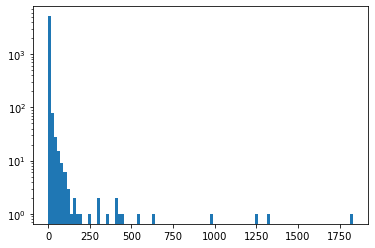

In [172]:
degrees = [aspect_graph.degree(n) for n in aspect_graph.nodes()]
plt.hist(degrees, bins=100, log=True)
plt.show()

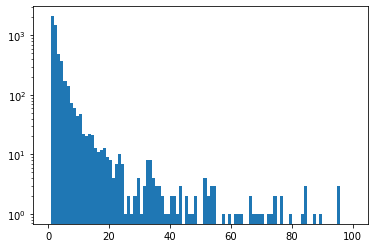

In [173]:
degrees = [aspect_graph.degree(n) for n in aspect_graph.nodes()]
plt.hist(degrees, bins=100, log=True, range=(0, 100))
plt.show()

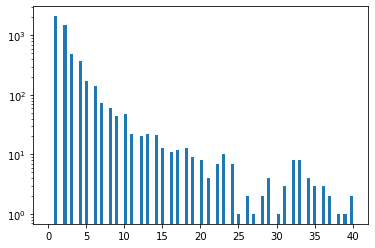

In [174]:
degrees = [aspect_graph.degree(n) for n in aspect_graph.nodes()]
plt.hist(degrees, bins=100, log=True, range=(0, 40))
plt.show()

In [180]:
np.mean([aspect_graph.degree(n) for n in aspect_graph.nodes()])

5.671619334211021

### Out degree

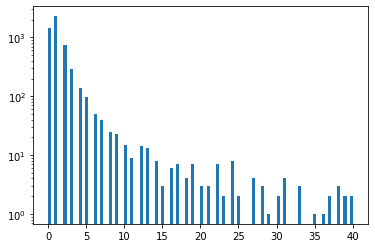

In [178]:
degrees = [aspect_graph.out_degree(n) for n in aspect_graph.nodes()]
plt.hist(degrees, bins=100, log=True, range=(0, 40))
plt.show()

In [179]:
np.mean([aspect_graph.out_degree(n) for n in aspect_graph.nodes()])

2.8358096671055106

# Get neighborhood dump info

In [181]:
conceptnet_hierarchy_neighborhood = serializer.load(experiment_paths.conceptnet_hierarchy_neighborhood)

In [182]:
neighborhood_df = pd.DataFrame([
    neighborhood
    for aspect, metadata in conceptnet_hierarchy_neighborhood.items()
    for neighborhood in metadata
])            

In [183]:
neighborhood_df

,name,rank,neighbors_names,neighbors_path_lens,neighbors_cn_path_lens,aspects_not_in_conceptnet,cn_hierarchy_confirmed
0,screen,1,[],[],[],[],[]
1,screen,2,"[screen, screenshot]","[2, 2]","[0, 1]","[screen, screenshot]",[]
2,screen,3,[],[],[],[],[]
3,song,1,"[screen, amazon]","[1, 1]","[3, 6]","[screen, amazon]",[]
4,song,2,"[song, program, droid, kindle fire, interface,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 3, 7, 6, 5, 5, 6, 5, 3, 5, 4, 3, 6, 11, 4,...","[song, program, droid, kindle fire, interface,...",[]
...,...,...,...,...,...,...,...
4348,al qaeda,2,[al qaeda],[2],[0],[al qaeda],[]
4349,al qaeda,3,[],[],[],[],[]
4350,vine,1,"[bible, word]","[1, 1]","[7, 8]","[bible, word]",[]
4351,vine,2,"[video, droid, kindle fire, interface, microso...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 10, 7, 5, 7, 7, 7, 8, 8, 5, 6, 7, 7, 7, 7,...","[video, droid, kindle fire, interface, microso...",[]


In [184]:
# neighborhood_df['hierarchical_proportion'] = neighborhood_df.cn_hierarchy_confirmed.apply(lambda cn: sum(cn)/len(cn) if cn else 0)
# neighborhood_df = neighborhood_df[neighborhood_df.hierarchical_proportion>0.1]
# neighborhood_df.sort_values('hierarchical_proportion')

## Skip zero proportions 

In [185]:
# neighborhood_df = neighborhood_df[neighborhood_df.hierarchical_proportion > 0]

## Skip 0 len paths 

In [186]:
neighborhood_df.neighbors_cn_path_lens = neighborhood_df.neighbors_cn_path_lens.apply(lambda paths: [path for path in paths if path])

In [187]:
neighborhood_df

,name,rank,neighbors_names,neighbors_path_lens,neighbors_cn_path_lens,aspects_not_in_conceptnet,cn_hierarchy_confirmed
0,screen,1,[],[],[],[],[]
1,screen,2,"[screen, screenshot]","[2, 2]",[1],"[screen, screenshot]",[]
2,screen,3,[],[],[],[],[]
3,song,1,"[screen, amazon]","[1, 1]","[3, 6]","[screen, amazon]",[]
4,song,2,"[song, program, droid, kindle fire, interface,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3, 7, 6, 5, 5, 6, 5, 3, 5, 4, 3, 6, 11, 4, 4,...","[song, program, droid, kindle fire, interface,...",[]
...,...,...,...,...,...,...,...
4348,al qaeda,2,[al qaeda],[2],[],[al qaeda],[]
4349,al qaeda,3,[],[],[],[],[]
4350,vine,1,"[bible, word]","[1, 1]","[7, 8]","[bible, word]",[]
4351,vine,2,"[video, droid, kindle fire, interface, microso...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 10, 7, 5, 7, 7, 7, 8, 8, 5, 6, 7, 7, 7, 7,...","[video, droid, kindle fire, interface, microso...",[]


## Remove aspects with no paths to any neighbor 

In [190]:
len(neighborhood_df)

1065

In [188]:
neighborhood_df = pd.concat([
    g 
    for _, g in tqdm(neighborhood_df.groupby('name')) 
    for _, row in g.iterrows()
    if len(row.neighbors_cn_path_lens) > 0
]).drop_duplicates(subset=['name', 'rank'])

100%|██████████| 1451/1451 [00:01<00:00, 1238.49it/s]


In [189]:
len(neighborhood_df)

1065

## Skip aspects without all ranks paths 

In [191]:
neighborhood_df = pd.concat([g for _, g in neighborhood_df.groupby('name') if len(g) == 3])

In [192]:
len(neighborhood_df)

1065

# Calculate differences between aspect graph shortests paths of neioghbors and cn shortest paths 

In [198]:
shortest_paths_diferences = []
    
for _, row in tqdm(neighborhood_df.iterrows()):
    rank = row['rank']
    if len(row.neighbors_path_lens) == len(row.neighbors_cn_path_lens):
        shortest_paths_diferences.append(
            np.subtract(
                np.array(row.neighbors_cn_path_lens), 
                np.array(row.neighbors_path_lens)
            )
        )

1065it [00:00, 3691.82it/s]


In [199]:
len(shortest_paths_diferences)

1065

In [200]:
neighborhood_df['shortest_paths_diferences'] = shortest_paths_diferences

In [206]:
df = neighborhood_df[neighborhood_df.shortest_paths_diferences.isna()]

In [207]:
df

,name,rank,neighbors_names,neighbors_path_lens,neighbors_cn_path_lens,aspects_not_in_conceptnet,cn_hierarchy_confirmed,shortest_paths_diferences
997,action,2,"[screen, kindle fire, jack, interface, blackja...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 12, 6,...","[screen, kindle fire, jack, interface, blackja...",[],None
2125,alaska,2,"[screen, song, program, droid, kindle fire, in...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[6, 4, 6, 8, 6, 4, 6, 7, 6, 5, 5, 7, 7, 5, 14,...","[screen, song, program, droid, kindle fire, in...",[],None
52,amazon,2,"[laptop, napster, amazon, strength, radio stat...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 8, 6, 8, 7, 7, 7, 7, 9, 7, 6, 7, 8, 7, 9, ...","[laptop, napster, amazon, strength, radio stat...",[],None
2263,america,2,"[screen, program, droid, kindle fire, jack, in...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 4, 6, 4, 4, 3, 4, 4, 3, 3, 5, 3, 5, 8, 12,...","[screen, program, droid, kindle fire, jack, in...",[],None
319,amsterdam,2,[amsterdam],[2],[],[amsterdam],[],None
...,...,...,...,...,...,...,...,...
391,work,2,"[screen, song, program, droid, kindle fire, in...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 3, 3, 4, 3, 3, 5, 4, 4, 4, 4, 5, 4, 11, 3,...","[screen, song, program, droid, kindle fire, in...",[],None
19,works,2,"[song, program, droid, works, laptop, customer...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[5, 6, 9, 7, 7, 8, 7, 8, 6, 7, 7, 8, 7, 7, 7, ...","[song, program, droid, works, laptop, customer...",[],None
94,world,2,"[screen, program, song, droid, kindle fire, in...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 4, 5, 6, 4, 3, 5, 3, 3, 3, 5, 6, 3, 4, 12,...","[screen, program, song, droid, kindle fire, in...",[],None
3248,xp,3,"[song, kindle fire, interface, laptop, custome...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[5, 7, 6, 6, 6, 5, 7, 7, 5, 7, 6, 10, 7, 7, 6,...","[song, kindle fire, interface, laptop, custome...",[],None


In [146]:
neighborhood_df['shortest_paths_diferences_mean'] = neighborhood_df.shortest_paths_diferences.apply(np.mean)

/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [147]:
neighborhood_df

,name,rank,neighbors_names,neighbors_path_lens,neighbors_cn_path_lens,aspects_not_in_conceptnet,cn_hierarchy_confirmed,shortest_paths_diferences,shortest_paths_diferences_mean
936,aaa,1,"[price, use, battery, ac, blackberry, recharge...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[11, 6, 4, 5, 5, 8, 4, 5, 4, 3]","[price, use, battery, ac, blackberry, recharge...",[],"[10, 5, 3, 4, 4, 7, 3, 4, 3, 2]",4.500000
937,aaa,2,"[case, video camera, quality, shipping, russia...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 6, 7, 5, 4, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, ...","[case, video camera, quality, shipping, russia...",[],"[2, 4, 5, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, ...",3.300000
938,aaa,3,"[price, use, nook, battery, tablet, ac, update...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[11, 6, 5, 4, 6, 5, 6, 5, 6, 5, 5, 4, 10, 5, 6...","[price, use, nook, battery, tablet, ac, update...",[],"[8, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 1, 7, 2, 3, ...",2.205882
3762,action,1,[],[],"[7, 6, 4, 6, 10, 10, 5, 4, 6, 4, 5, 6, 7, 6, 5...",[],[],"[6, 5, 3, 5, 9, 9, 4, 3, 5, 3, 4, 5, 6, 5, 4, ...",4.809907
3763,action,2,[],[],"[7, 6, 4, 6, 10, 10, 5, 4, 6, 4, 5, 6, 7, 6, 5...",[],[],"[5, 4, 2, 4, 8, 8, 3, 2, 4, 2, 3, 4, 5, 4, 3, ...",3.809907
...,...,...,...,...,...,...,...,...,...
2986,zodiac,2,[],[],"[2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, ...",[],[],"[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",0.321739
2987,zodiac,3,[],[],"[2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, ...",[],[],"[-1, -1, 0, -1, 0, -1, -1, 0, -1, -1, -1, -1, ...",-0.678261
4632,zone,1,[],[],"[1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, ...",[],[],"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...",0.478261
4633,zone,2,[],[],"[1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, ...",[],[],"[-1, 0, -1, -1, -1, -1, -1, 0, -1, -1, 0, 0, -...",-0.521739


# Paths differences analysis

## Average shortest paths difference

Average for rank 1: 3.672469578176359
Average for rank 2: 2.9068762685740457
Average for rank 3: 1.8597841738657395


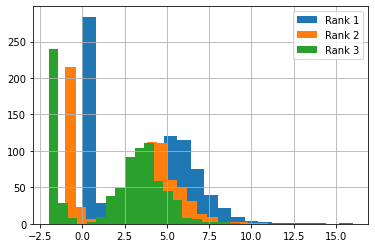

In [159]:
ranks = []
for r, group in neighborhood_df.groupby('rank'):
    ranks += [f'Rank {r}']
    print(f'Average for rank {r}: {group.shortest_paths_diferences_mean.mean()}')
    group.shortest_paths_diferences_mean.hist(bins=20)
plt.legend(ranks)